In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
bostons_df=pd.read_csv('Boston_Housing_project_df.csv')

In [5]:
bostons_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
bostons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [7]:
bostons_df.shape

(506, 14)

In [9]:
bostons_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Creating a Boxplot for the Median Value of Owner Occupied Homes (MEDV) Column

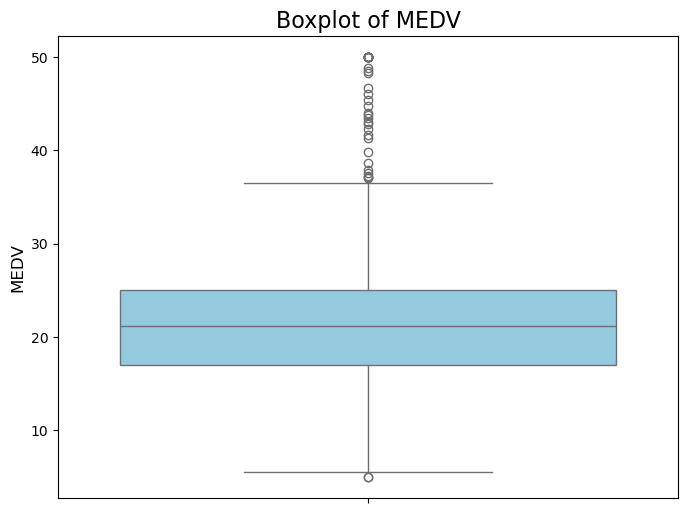

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=bostons_df['MEDV'], color='skyblue')
plt.title('Boxplot of MEDV', fontsize=16)
plt.ylabel('MEDV', fontsize=12)
plt.show()

This boxplot shows the distribution of median house values (MEDV), revealing some outliers above $40,000. The presence of this outliers indicates that there are some houses in the dataset with median values significantly higher than the majority of the data. This can suggest variability in housing prices, possibly due to factors like location, size, or condition of the homes.

## Creating a Bar plot for the Charles River Variable

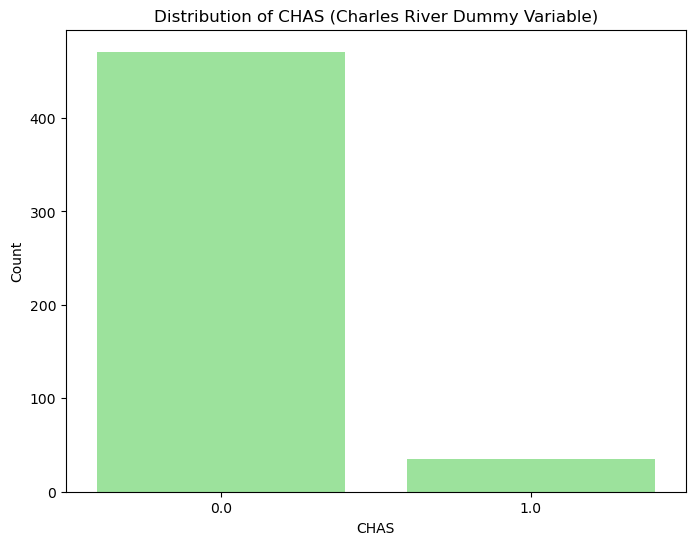

In [14]:
# Creating a bar plot for the CHAS column
plt.figure(figsize=(8, 6))
sns.countplot(x=bostons_df['CHAS'], color='lightgreen')
plt.title('Distribution of CHAS (Charles River Dummy Variable)', fontsize=12)
plt.xlabel('CHAS', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

 The CHAS variable in the Boston Housing dataset is a binary indicator (0 or 1) that signifies whether a property is located near the Charles River or not. where '0' Indicates that the property is not located near the Charles River, and '1' Indicates that the property is located near the Charles river.  In this graph The x-axis shows the two categories (0 and 1), while the y-axis shows the number of properties in each category. We can see from here that a majority of the houses are not located near the Charles river

## Plotting a Box Plot showing MEDV vs AGE into three Groups

C:\Users\ACER\AppData\Local\Temp\ipykernel_2472\3475981840.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_group', y='MEDV', data=bostons_df, palette='pastel')


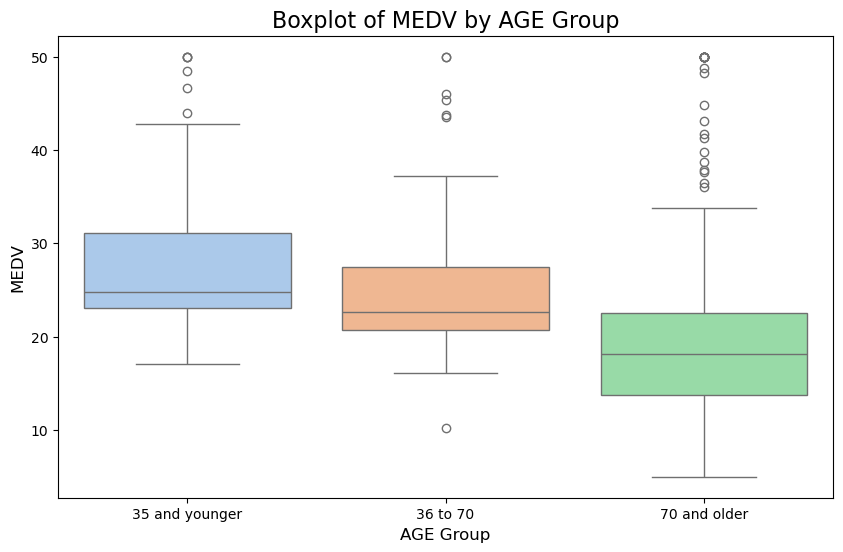

In [26]:
# Categorizing the AGE column into three groups
bins = [0, 35, 70, 100]
labels = ['35 and younger', '36 to 70', '70 and older']
bostons_df['AGE_group'] = pd.cut(bostons_df['AGE'], bins=bins, labels=labels, right=True)

# Creating a boxplot for MEDV vs AGE_group
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=bostons_df, palette='pastel')
plt.title('Boxplot of MEDV by AGE Group', fontsize=16)
plt.xlabel('AGE Group', fontsize=12)
plt.ylabel('MEDV', fontsize=12)
plt.show()

By plotting MEDV against the newly created AGE groups, we can easily compare how the median house values differ across these 3 age categories.

## A Scatter Plot showing the Relationship between Nitrate Oxide Concentrations (NOX) and Proportion of Non retail Business Acres per Town(INDUS)

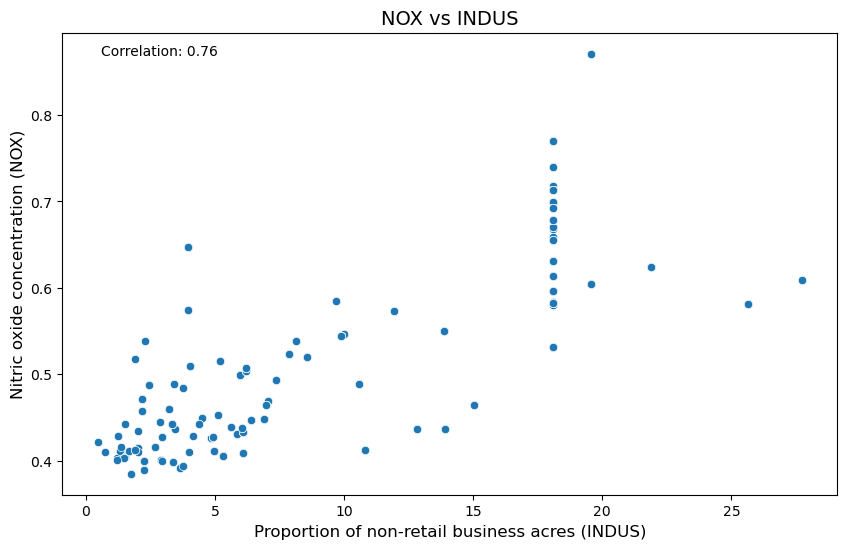

In [27]:
# Creating a scatter plot for NOX vs INDUS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=bostons_df)
plt.title('NOX vs INDUS', fontsize=14)
plt.xlabel('Proportion of non-retail business acres (INDUS)', fontsize=12)
plt.ylabel('Nitric oxide concentration (NOX)', fontsize=12)

# Calculate correlation coefficient
correlation = bostons_df['NOX'].corr(bostons_df['INDUS'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.show()

The scatter plot reveals a strong positive correlation (0.76) between industrial areas (INDUS) and nitric oxide concentration (NOX). The relationship appears to be non-linear, with NOX levels increasing more rapidly at lower INDUS values and then leveling off at higher industrial concentrations

 ## A histogram to visualize the distribution of the PTRATIO variable, which represents the pupil-teacher ratio by town.

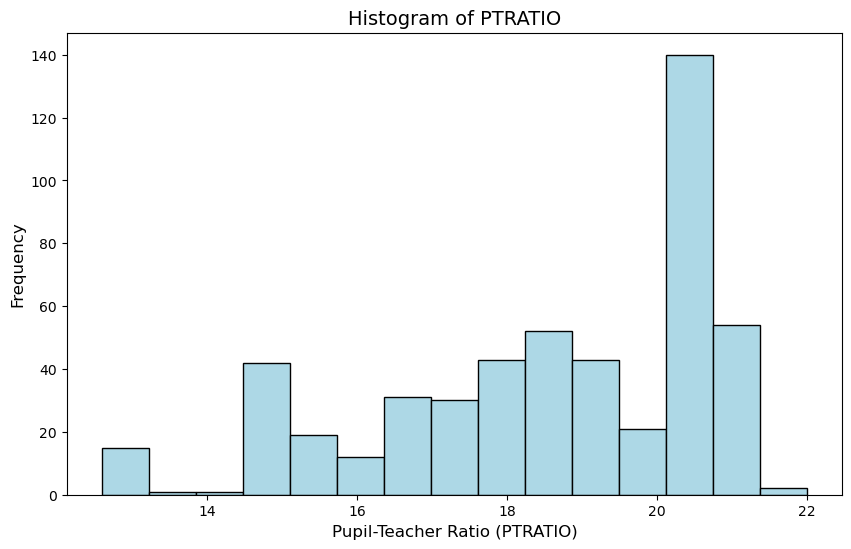

In [29]:
# Creating a histogram for the PTRATIO variable
plt.figure(figsize=(10, 6))
plt.hist(bostons_df['PTRATIO'], bins=15, color='lightblue', edgecolor='black')
plt.title('Histogram of PTRATIO', fontsize=14)
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Pupil-teacher ratio (PTRATIO): This is a specific variable in the dataset that indicates the number of students per teacher in a school. A lower ratio typically suggests more individual attention for students, while a higher ratio may indicate larger class sizes.

## Performing a T-test to show if there is a significant difference in median values of houses bounded by the charles river or not

In [30]:
# Performing independent t-test
from scipy import stats

# Separate MEDV values based on CHAS
river = bostons_df[bostons_df['CHAS'] == 1]['MEDV']
no_river = bostons_df[bostons_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_value = stats.ttest_ind(river, no_river)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Calculate mean values for both groups
print("\
Mean MEDV for houses near Charles River:", river.mean())
print("Mean MEDV for houses not near Charles River:", no_river.mean())

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Mean MEDV for houses near Charles River: 28.439999999999998
Mean MEDV for houses not near Charles River: 22.093842887473464


The T-test results indicate a significant difference in median house values (MEDV) between houses near the Charles River and those not near it, as the p-value is very small (0.00007). Here are the results:

T-statistic: 3.996437466090509

P-value: 7.390623170519905e-05

Mean MEDV for houses near Charles River: 28.439999999999998

Mean MEDV for houses not near Charles River: 22.093842887473464

This suggests that proximity to the Charles River has a statistically significant impact on house values.

## Performing an ANOVA to reveal a suggested difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE). 

In [31]:

# Hypotheses:
# Null Hypothesis (H0): There is no significant difference in MEDV across AGE groups.
# Alternative Hypothesis (H1): There is a significant difference in MEDV across AGE groups.

# Discretizing AGE into bins
bins = [0, 35, 70, 100]
labels = ['35 and younger', '36 to 70', '70 and older']
bostons_df['AGE_group'] = pd.cut(bostons_df['AGE'], bins=bins, labels=labels, right=True)

# Grouping MEDV by AGE groups
medv_groups = [bostons_df[bostons_df['AGE_group'] == label]['MEDV'] for label in labels]

# Performing ANOVA
f_stat, p_value = f_oneway(*medv_groups)

print("F-statistic:", f_stat)
print("P-value:", p_value)

# Significance level
alpha = 0.05
if p_value < alpha:
    print("\
Result: Reject the null hypothesis. There is a significant difference in MEDV across AGE groups.")
else:
    print("\
Result: Fail to reject the null hypothesis. No significant difference in MEDV across AGE groups.")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Result: Reject the null hypothesis. There is a significant difference in MEDV across AGE groups.


ANOVA (Analysis of Variance) test, is a statistical method used to compare the means of three or more groups to determine if at least one group mean is significantly different from the others. 
So to perform the ANOVA, I first stated the hypotheses, then grouped the data by the AGE variable (discretized into bins), and then calculated the test statistics to determine if there is a significant difference in MEDV across these groups.

After the ANOVA test was successfully performed, the results indicates a significant difference in median house values (MEDV) across the AGE groups. Here are the results:

F-statistic: 36.40764999196599

P-value: 1.7105011022702984e-The F-statistic here is a ratio that compares the variance between the groups to the variance within the groups. A higher F-statistic indicates a greater degree of difference between the group means. this case, the F-statistic is approximately 36.41, which suggests a strong difference in MEDV across the AGE groups.
also the P-value is very small and indicates strong evidence against the null hypothesis.
15

ConcluWeResult: Reject the null hypothesis. There is a significant difference in MEDV across AGE  oups.

This suggests that the proportion of owner-occupied uniacross the different AGE groups940 (AGE) significanty impacts the median hou.
The Implication of this is that the age of the houses (specifically, whether they were built before 1940) has a significant impact on their median house values, hence older houses may have different characteristics, desirability, or market value compared to newer ones.t
Tthe age of the houses istherefore  an important factor influencing their market value, and this finding could be useful for real estate analysi and, investment decisinso
se values


## Performing a Pearson's Correlation to see if we can conclude that there is no relationship between Nitric Oxide Concentrations(NOX) and Proportion of non Retail Businesses Acres per Town(INDUS)

In [32]:
# Calculating Pearson's correlation coefficient between NOX and INDUS
correlation_coefficient, p_value = stats.pearsonr(bostons_df['NOX'], bostons_df['INDUS'])

print("Pearson's Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Significance level
alpha = 0.05
if p_value < alpha:
    print("\
Result: Reject the null hypothesis. There is a significant relationship between NOX and INDUS.")
else:
    print("\
Result: Fail to reject the null hypothesis. No significant relationship between NOX and INDUS.")

Pearson's Correlation Coefficient: 0.7636514469209161
P-value: 7.913361061232958e-98
Result: Reject the null hypothesis. There is a significant relationship between NOX and INDUS.


Pearson's correlation, measures the strength and direction of the linear relationship between two continuous variables.
Based on the Pearson's correlation results;
a Strong positive correlation (r = 0.76) 
and a small p-value (p < 0.05) 
We reject the null hypothesis, confirming a significant relationship between NOX (nitric oxide concentrations) and INDUS (proportion of non-retail business acres per town).

to further explain this; A value of 0.76 indicates a strong positive correlation, meaning that as one variable increases, the other variable tends to also increase. In this case, it suggests that higher nitric oxide concentrations are associated with a higher proportion of non-retail business acres.

While the p-value tests the null hypothesis, which typically states that there is no relationship between the two variables. A p-value less than 0.05 indicates that the observed correlation is statistically significant, meaning it is unlikely to have occurred by random chance. Therefore, we reject the null hypothesis.res.

## Performing a Regression Analysis to show the impact of an additional weighted distance to the five boston employment centres (DIS) on the Median Level of Owner Occupied Homes (MEDV), 

To perform the regression analysis, I will first state the hypotheses, then fit a linear regression model to evaluate the impact of the weighted distance to employment centers (DIS) on the median value of owner-occupied homes (MEDV), and finally interpret the test statistics.

Hypotheses:

Null Hypothes

 
0
​
 ): The coefficient of DIS is zero, meaning DIS has no impact on MEDV.
Alternative HptH
1
H 
1
​
 ): The coefficient of DIS is not zero, meaning DIS has an impact on MEDV.
Let me proceed with the regression analysis.

In [33]:


# Defining the independent variable (DIS) and dependent variable (MEDV)
X = bostons_df['DIS']
Y = bostons_df['MEDV']

# Adding a constant to the independent variable for the regression model
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(Y, X).fit()

# Displaying the summary of the regression analysis
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        02:23:39   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

The results indicates that the weighted distance to employment centers (DIS) has a statistically significant positive impact on the median value of owner-occupied homes (MEDV) (p-value < 0.05).

A positive impact here indicates that as the DIS value increases (meaning as homes are further located from employment centers), the MEDV also increases. This could suggest that homes further away from employment centers are valued higher, which might seem counterintuitive but could also be explained by factors like larger homes and better neighborhoods.

The p-value less than 0.05 indicates strong evidence against the null hypothesis which states that there is no effect or relationship. therefore it suggests that the relationship between DIS and MEDV is statistically significant, meaning we can be reasonably confident that the observed effect is real and not due to random variations.

 This analysis however found a reliable and meaningful relationship where greater distances to employment centers are associated with higher median home values, which could have implications for understanding housing market dynamics and urban planning



In [ ]:
ANALYSIS BY
Rahmat Usman
ladyrahama@gmail.com